In [29]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import keras 
from keras.models import Sequential
from keras.layers import LSTM
from keras.layers.core import Dense, Activation, Dropout
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
import tensorflow as tf

In [30]:
data=pd.read_csv('datasets/GOOGHistoricalNOCP6m.csv')
print(data)

    Symbol  Trade DATE     NOCP
0     GOOG   6/21/2019  1121.88
1     GOOG   6/20/2019  1111.42
2     GOOG   6/19/2019  1102.33
3     GOOG   6/18/2019  1103.60
4     GOOG   6/17/2019  1092.50
..     ...         ...      ...
119   GOOG  12/31/2018  1035.61
120   GOOG  12/28/2018  1037.08
121   GOOG  12/27/2018  1043.88
122   GOOG  12/26/2018  1039.46
123   GOOG  12/24/2018   976.22

[124 rows x 3 columns]


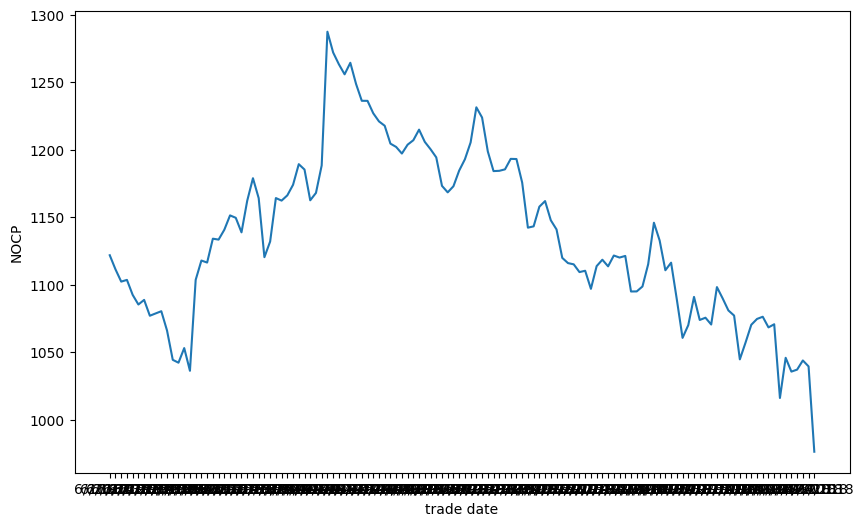

In [31]:
plt.figure(figsize=(10,6))
plt.plot(data['Trade DATE'],data['NOCP'])
plt.xlabel('trade date')
plt.ylabel('NOCP')
plt.show()

In [32]:
data['tradedate']=pd.to_datetime(data['Trade DATE'])
data['tradedate']=data['tradedate'].astype('int64')
print(data)
data2=data[data.columns.drop('Trade DATE')]

data3=data2[['tradedate','NOCP']].values
print(data3)
scalar=MinMaxScaler()
data1=scalar.fit_transform(data3)
data1

    Symbol  Trade DATE     NOCP            tradedate
0     GOOG   6/21/2019  1121.88  1561075200000000000
1     GOOG   6/20/2019  1111.42  1560988800000000000
2     GOOG   6/19/2019  1102.33  1560902400000000000
3     GOOG   6/18/2019  1103.60  1560816000000000000
4     GOOG   6/17/2019  1092.50  1560729600000000000
..     ...         ...      ...                  ...
119   GOOG  12/31/2018  1035.61  1546214400000000000
120   GOOG  12/28/2018  1037.08  1545955200000000000
121   GOOG  12/27/2018  1043.88  1545868800000000000
122   GOOG  12/26/2018  1039.46  1545782400000000000
123   GOOG  12/24/2018   976.22  1545609600000000000

[124 rows x 4 columns]
[[1.5610752e+18 1.1218800e+03]
 [1.5609888e+18 1.1114200e+03]
 [1.5609024e+18 1.1023300e+03]
 [1.5608160e+18 1.1036000e+03]
 [1.5607296e+18 1.0925000e+03]
 [1.5604704e+18 1.0853500e+03]
 [1.5603840e+18 1.0887700e+03]
 [1.5602976e+18 1.0770300e+03]
 [1.5602112e+18 1.0787200e+03]
 [1.5601248e+18 1.0803800e+03]
 [1.5598656e+18 1.0660400e+03]

array([[1.        , 0.4678186 ],
       [0.99441341, 0.43422405],
       [0.98882682, 0.40502955],
       [0.98324022, 0.40910843],
       [0.97765363, 0.37345838],
       [0.96089385, 0.3504946 ],
       [0.95530726, 0.36147867],
       [0.94972067, 0.32377312],
       [0.94413408, 0.32920092],
       [0.93854749, 0.33453237],
       [0.92178771, 0.28847636],
       [0.91620112, 0.21878212],
       [0.91061453, 0.21197328],
       [0.90502793, 0.24675617],
       [0.89944134, 0.1927351 ],
       [0.88268156, 0.40920478],
       [0.87709497, 0.45519656],
       [0.87150838, 0.4504111 ],
       [0.86592179, 0.50722636],
       [0.84357542, 0.50504239],
       [0.83798883, 0.52848792],
       [0.83240223, 0.5626927 ],
       [0.82681564, 0.55694373],
       [0.82122905, 0.52232143],
       [0.80446927, 0.59763618],
       [0.79888268, 0.65120761],
       [0.79329609, 0.60377055],
       [0.7877095 , 0.46319373],
       [0.78212291, 0.50041752],
       [0.76536313, 0.60396326],
       [0.

In [59]:
train_size=int(data1.shape[0]*0.75)
xtrain,xtest=data1[0:train_size,:],data1[train_size:,]
x_train,x_test=xtrain,xtest

In [60]:
def create_datasets(series,window):
    x_data,y_data=[],[]
    for i in range(len(series)-window-1):
        a=[]
        for j in range(0,window):
            a.append(series[[i+j],:])
        x_data.append(a)
        y_data.append(series[i+window,1])
    return (np.array(x_data),np.array(y_data))

window=5
xtrain,ytrain=create_datasets(xtrain,window)
xtest,ytest=create_datasets(xtest,window)
xtrain=np.reshape(xtrain,(xtrain.shape[0],xtrain.shape[1],2))
xtest=np.reshape(xtest,(xtest.shape[0],xtest.shape[1],2))
print(xtrain.shape,xtest.shape)


(87, 5, 2) (25, 5, 2)


In [61]:
xtrain.shape
model=Sequential([
    keras.layers.LSTM(4,input_shape=(5,2)),
    keras.layers.Dense(1)
])
model.summary()
model.compile(loss='mean_squared_error',optimizer='adam',metrics=['accuracy'])
model.fit(xtrain,ytrain,epochs=10,batch_size=1)

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_5 (LSTM)               (None, 4)                 112       
                                                                 
 dense_5 (Dense)             (None, 1)                 5         
                                                                 
Total params: 117
Trainable params: 117
Non-trainable params: 0
_________________________________________________________________
Epoch 1/10
87/87 [==============================] - 1s 4ms/step - loss: 0.2092 - accuracy: 0.0000e+00
Epoch 2/10
87/87 [==============================] - 0s 3ms/step - loss: 0.0582 - accuracy: 0.0115
Epoch 3/10
87/87 [==============================] - 0s 3ms/step - loss: 0.0431 - accuracy: 0.0115
Epoch 4/10
87/87 [==============================] - 0s 3ms/step - loss: 0.0386 - accuracy: 0.0115
Epoch 5/10
87/87 [==============================] - 0s 3

3/3 [==============================] - 0s 5ms/step


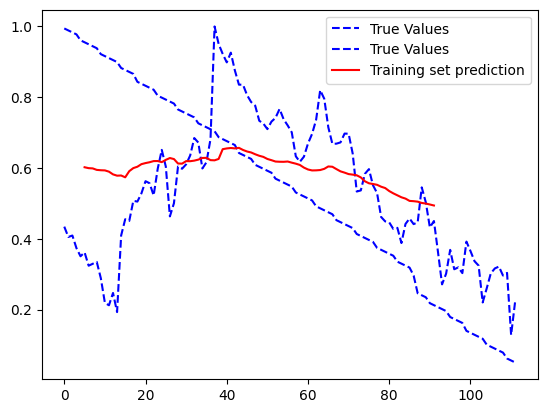

In [63]:
# plt.figure(figsize=(15,5))

plt.plot(np.concatenate((xtrain[:,1],xtest[:,1])),'--b',label='True Values')

plt.plot(range(window,len(xtrain)+window),model.predict(xtrain),'-r',label='Training set prediction')
# plt.plot(range(window+len(x_train),len(x_train)+len(x_test)-1),model.predict(xtest),'-g',label='Test set prediction')
# plt.xlabel("Days")
# plt.ylabel("Average Price")
# plt.title("Comparison true vs. predicted training / test", fontsize=16)
plt.legend()

plt.show()